## Predicting the mass sentiment response to the Covid vaccination based on Tweets

### *Outline*
#### I.  Scenario
#### II.  Study Objective
#### III.  Research Questions
#### IV.  Data Loading and Initial Exploration
    Main Data
#### V.  Initial Preprocessing
    Main Data
#### VI.  Exploratory Analyses
    Main Data
        Continuous data
        Discrete data
        Categorical data
        Text data
    * Answer Research Question 1
#### VII.  Modelling
    A.  Training Data
        1.  Loading 
        2.  Initial Exploration and Preprocessing
        3.  Model Classifiers
            a.  Cross validation run on Training Data's train subset
            b.  Using Training Data's test subset
        4.  Hyperparameter Tuning
        5.  Analyzing results of modelling on Training Data's test subset
    * Answer Research Question 2
    B.  Main Data
        1.  Predicting Labels
    * Answer Research Question 3
#### VIII.  Post-labelling Exploration of Main Data
    * Answer Research Question 4

#### IX.  Summary and Recommendations

#### X.  Conclusion

### I.  Scenario
Recognizing the importance of vaccination to resolve the pandemic, the Ministry of Health increased their efforts on gathering and analyzing data.

Our group was tasked to find out the lay peoples' acceptance for the Covid vaccination.  

### II.  Study Objective
Since Twitter is a widely-used venue for expression, utilize the information available in its database to gain perspective on the general response to Covid vaccination.

### III.  Research Questions

1.  What is the profile of tweets for Covid vaccination?

2.  Can we classify a tweet as positive or negative based on the text content?

3.  Is the mass response to the covid vaccination predominantly positive or negative?

4.  To be able to encourage advocacy, can we identify subgroups that show predominantly positive tweets?  To be able to recognize problems, can we identify subgroups that show predominantly negative tweets?

### IV.  Data Loading and Initial Exploration

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 150
pd.set_option('display.max_colwidth', 280)

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [19]:
# Data Source: https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets
main = pd.read_csv('dataset_for_sentiment_analysis_vaccination_all_tweets.csv')
main.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False


Findings:
-  May be able to use location, date and followings and retweets for profiling
-  No label 

--> will need a tool to assign positivity/emotion to the text

--> will not perform early splitting on this set; a separate dataset with labelled target will be used as a training set

--> may use unsupervised clustering to uncover patterns

In [5]:
main.info()
# --> need to convert to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125906 entries, 0 to 125905
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                125906 non-null  int64 
 1   user_name         125906 non-null  object
 2   user_location     89972 non-null   object
 3   user_description  116833 non-null  object
 4   user_created      125906 non-null  object
 5   user_followers    125906 non-null  int64 
 6   user_friends      125906 non-null  int64 
 7   user_favourites   125906 non-null  int64 
 8   user_verified     125906 non-null  bool  
 9   date              125906 non-null  object
 10  text              125906 non-null  object
 11  hashtags          101894 non-null  object
 12  source            125787 non-null  object
 13  retweets          125906 non-null  int64 
 14  favorites         125906 non-null  int64 
 15  is_retweet        125906 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [6]:
N= len(main)
(main.isnull().sum()) / N *100
## need to impute missing values later

id                   0.000000
user_name            0.000000
user_location       28.540340
user_description     7.206170
user_created         0.000000
user_followers       0.000000
user_friends         0.000000
user_favourites      0.000000
user_verified        0.000000
date                 0.000000
text                 0.000000
hashtags            19.071371
source               0.094515
retweets             0.000000
favorites            0.000000
is_retweet           0.000000
dtype: float64

#### Initial Exploration:  Continuous

In [7]:
main.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.259060e+05,1.259060e+05,125906.000000,1.259060e+05,125906.000000,125906.000000
mean,1.385793e+18,1.106664e+05,1093.166283,1.364298e+04,2.976872,13.274046
std,1.740242e+16,8.887440e+05,5241.860209,4.179660e+04,55.194169,194.277738
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.372300e+18,1.070000e+02,80.000000,1.460000e+02,0.000000,0.000000
50%,1.383376e+18,5.460000e+02,309.000000,1.623000e+03,0.000000,1.000000
75%,1.402291e+18,2.092000e+03,932.000000,9.128250e+03,1.000000,3.000000
max,1.410706e+18,1.578068e+07,516578.000000,1.221784e+06,11288.000000,25724.000000


In [8]:
main.id.nunique()  ==N
## all entries unique --> may drop, just use index

True

#### Initial Exploration:  Discrete

In [9]:
discrete = main.select_dtypes('bool').columns

print('Unique values: ')
for col in discrete:
    unique =    main[col].unique() 
    print(col, unique)
## single value for is_retweet --> drop

Unique values: 
user_verified [False  True]
is_retweet [False]


#### Initial Exploration:  Categoricals

In [10]:
categorical = main.select_dtypes('object').columns

print('Percentage of unique values:\n ')
for col in categorical:
    unique =    main[col].nunique() 
    unique = round(unique/N*100,2)
    print(col, unique)

Percentage of unique values:
 
user_name 46.16
user_location 14.58
user_description 44.74
user_created 47.01
date 98.17
text 99.42
hashtags 30.73
source 0.23


#### *Findings on Cardinality:*
    - Very high:  date, text
    - High: user_name, user_description, user_created, hashtags
    - Moderate: user_location
    - Minimal: source

In [11]:
# exploring user_name
main[ main.user_name == 'Dee']
# user_name not a unique identifier
# user_created: same date per user_name
# location not necessarily the same
# user description may vary even for the same person
#   (seen on exploration of another name)
#  --> not very helpful, don't use

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fellow in IBD, mother to human and fur baby, Canadian in Britain",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN,NaN,Twitter for iPhone,0,0,False
1432,1341347758767284224,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fellow in IBD, mother to human and fur baby, Canadian in Britain",2020-01-26 21:43:12,107,108,108,False,2020-12-22 11:40:01,I may not be eligible for the covid vaccine but I can ensure that my family stay safe. Here’s looking to a better 2… https://t.co/oJ9maz5Pgg,NaN,Twitter for iPhone,0,4,False
3658,1350122542254714880,Dee,NaN,"Light, but excessive.",2011-08-22 03:26:30,1374,540,19556,False,2021-01-15 16:47:52,Got my first dose today! #PfizerBioNTech https://t.co/hKHqu1G2ff,['PfizerBioNTech'],Twitter for iPhone,0,5,False
3934,1350785637201403907,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fellow in IBD, mother to human and fur baby, Canadian in Britain",2020-01-26 21:43:12,112,112,119,False,2021-01-17 12:42:46,"Breastfeeding 2 week old but with guidelines recently changed, got my covid vaccine. grateful to all the staff… https://t.co/JO9iZiQlIg",NaN,Twitter for iPhone,1,15,False
5290,1357716362198679559,Dee,NaN,"Light, but excessive.",2011-08-22 03:26:30,1375,536,19618,False,2021-02-05 15:43:00,Got my second dose! #PfizerBioNtech https://t.co/ahZb0DGk0U,['PfizerBioNtech'],Twitter for iPhone,0,1,False
34386,1373358571375710208,Dee,"Derby, England","mummy to 3 beautiful girlies, in love with an amazing man!! making memories as a family",2015-09-21 03:42:13,34,133,253,False,2021-03-20 19:39:33,First vaccine done and dusted #OxfordAstraZeneca,['OxfordAstraZeneca'],Twitter for Android,0,2,False
55281,1380006569304236032,Dee,Bharat,You are the sky. Everything else is just the weather,2012-11-11 14:58:43,89,282,6492,False,2021-04-08 03:56:20,yeah that's it! you will pay to choose a poison #Covaxin #Covishield https://t.co/KCxWzKOIrq,"['Covaxin', 'Covishield']",Twitter Web App,0,0,False
83283,1398336816714076160,Dee,New jersey,"Influencing you each day at a time 😘 Psych, Human Services, Mental health",2011-01-09 02:57:42,2751,485,106743,False,2021-05-28 17:54:11,I am fully vaccinated #CovidVaccine #Moderna https://t.co/E7BKnHLnT6,"['CovidVaccine', 'Moderna']",Twitter for iPhone,0,1,False
84085,1397326077689843716,Dee,"Ontario, Canada",me,2009-03-25 01:01:52,318,301,24014,False,2021-05-25 22:57:52,"Both of my kids have received their first shot!! (Me too) Daughter has moderna, son had Pfizer, I had AZ #thankful… https://t.co/9oxhfy3ce8",['thankful'],Twitter for iPhone,0,2,False
98415,1403584726334468098,Dee,Bengaluru,"Pick a situation, I'll make it awkward 9/10 times. she/her",2021-06-02 15:53:17,0,17,14,False,2021-06-12 05:27:30,"Just got vaccinated!! Conducted at New Horizon School, Indira Nagar by Fortis Team. Very well managed! \n\n#fortis #covaxin","['fortis', 'covaxin']",Twitter for Android,0,2,False


#### Decision on Features to Use Based on Initial Exploration
####  Use:
'user_location', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'source', 'retweets', 'favorites'
#### Drop:
id, is_retweet,
user_name, user_description, user_created, hashtags


####  Exploration of Features to be Used

In [12]:
# user_location
main.user_location.value_counts().head(30)
## detailed cities for india, us --> need to generalize

India                             5352
Toronto, Canada  and Worldwide    2310
New Delhi, India                  2138
Mumbai, India                     1334
United States                      942
New Delhi                          874
Bengaluru, India                   830
Mumbai                             707
London, England                    695
Beijing, China                     657
Toronto, Ontario                   593
Hyderabad, India                   589
Canada                             588
Beijing                            544
Chennai, India                     530
Sri Lanka                          522
London                             509
Los Angeles, CA                    422
Michigan, USA                      414
United Kingdom                     405
Pakistan                           399
USA                                386
Delhi                              377
Pune, India                        356
Moscow, Russia                     355
Malaysia                 

In [13]:
# user_verified
(main.user_verified.value_counts()) / N * 100
# --> keep

False    90.022715
True      9.977285
Name: user_verified, dtype: float64

In [14]:
# text 
main.text.sample(1)
## need to address url, hash, @, emoticons,
#     case, some numbers (with and without commas,
#     1st, 2nd, punctuations, whitespace
##  --> need significant preprocessing

117525    [22:53:48] 400018, 29-06-2021, 42 dose2 at ESIS HOSPITAL WORLI MUMBAI, #COVAXIN ESIS Hospital G.K Marg Behind Podda… https://t.co/LPNxQMRAua
Name: text, dtype: object

In [15]:
# source
main.source.value_counts().head(10)
# may be secondary importance: advertisers/ promoters may 
#   find this interesting

Twitter for Android               35817
Twitter Web App                   35264
Twitter for iPhone                30407
cowin_vaccine_app                  7637
TweetDeck                          4781
Cowin Vaccination Availability     2073
Twitter for iPad                   1931
Instagram                          1636
Hootsuite Inc.                     1128
Buffer                              516
Name: source, dtype: int64

### V.   Initial Preprocessing 

In [20]:
# Step 1
# remove unnecessary columns

# Step 1a: defining tool
def dropping(df):
    var = main[['id', 'is_retweet','user_name',
                'user_description','user_created',
                'hashtags']]
    df = df.drop(var, axis=1, inplace=True)

# Step 1b: applying dropping
dropping(main)
main.head(1)

,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,source,retweets,favorites
0,"La Crescenta-Montrose, CA",405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,Twitter for Android,0,0


In [21]:
# Step 2
# generalize location
### refine if with time

# Step 2a: defining cleaning tool
import string
import re


def cleaning_loc(text):
    text = str(text)
    text = re.sub('[0-9]+','', text)
    text = ''.join([char for char in text if char not in set(string.punctuation)])
    text = text.lower()  
    text = re.sub(r'/^\s+|\s+$|s+(?=\s)/g', '', text) 
    text = text.strip()
    return text

# Step 2b: apply cleaning 
main['user_location'] = main['user_location'].apply(cleaning_loc)

# Step 2c: replacing with generalized name
def location(names, country, df):
    for n in names:
        df.user_location.replace(to_replace = [n],
                                value = country,
                                inplace=True)

# Step 2d: apply replacing location name
# refining location names with quantity >=150
location([str(np.NaN)], 'other', main)

location(['new delhi india',
          'mumbai india',
          'new delhi',
          'bengaluru india',
          'mumbai',
          'hyderabad india',
          'chennai india',
          'delhi',
          'chennai',
          'pune india',
          'hyderabad',
          'bengaluru',
          'bangalore',
          'kolkata india',
          'guwahati india',
          'new delhi delhi',
          'gurgaon india',
          'jaipur india',
          'delhi india',
          'bhubaneshwar india',
          'pune',
          'kharar sas nagar mohali',
          
         ],
                  'india', main)

location(['toronto canada  and worldwide',
         'earth',
          'planet earth',
          'world',
          'global',
          
         ],
                    'worldwide', main)

location(['beijing china'],
                    'china', main)

location(['london england',
         'london',
         'uk',
          'london uk',
          'england united kingdom',
         ],
                    'united kingdom', main)

location(['moscow russia'],
                     'russia', main)

location(['toronto ontario',
         'toronto',
         'ontario canada',
          'toronto canada',
         ],
                    'canada', main)

location(['beijing',
         'hong kong',
         '北京 中华人民共和国'],
                    'china', main)

location(['washington dc',
         'los angeles ca',
         'usa',
         'michigan usa',
          'new york ny',
          'california usa'
          'california united states',
          'new york usa',
          'houston tx',
          'california united states',
          'chicago il',
          'atlanta ga',
          'new york',
          'los angeles',
          'san francisco ca',
          'florida usa',
          'boston ma'
         ],
                    'united states', main)

location(['colombo sri lanka'],
                    'sri lanka', main)

location(['karachi pakistan',
         'lahore pakistan',
          'islamabad pakistan',
         ],
                    'pakistan', main)

location(['nairobi kenya'],
                    'kenya', main)

location(['dubai united arab emirates'],
                    'united arab emirates', main)

location(['bangkok thailand'],
                    'thailand', main)

location(['dublin ireland'],
                    'ireland', main)

main.head()

,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,source,retweets,favorites
0,la crescentamontrose ca,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,Twitter for Android,0,0
1,united states,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",Twitter Web App,1,1
2,your bed,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,Twitter for Android,0,0
3,vancouver bc canada,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",Twitter Web App,446,2129
4,other,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,Twitter for iPhone,0,0


In [22]:
# Step 3
# converting date to datetime, creating new time features
# previously determined: date with no missing value

# Step 3a defining tool
def dating(df):
    df['date']= pd.to_datetime(df.date)
    df.set_index('date', inplace=True)
    df['year'] = df.index.year
    df['year_mo'] = df.index.strftime('%Y-%m')
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek # 0= Monday
    df['hour'] = df.index.hour # assume local time
    df.year_mo.replace({'2020-12':1,
                                        '2021-01':2,
                                        '2021-02':3,
                                        '2021-03':4,
                                        '2021-04':5,
                                        '2021-05':6,
                                        '2021-06':7,
                                        '2021-07':8},
                                        inplace=True)

# Step 3b applying dating tool
dating(main)

main.head(1)

,user_location,user_followers,user_friends,user_favourites,user_verified,text,source,retweets,favorites,year,year_mo,month,day,dayofweek,hour
date,,,,,,,,,,,,,,,
2020-12-20 06:06:44,la crescentamontrose ca,405,1692,3247,False,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,Twitter for Android,0,0,2020,1,12,20,6,6


In [24]:
# Step 4: Preprocessing text
## some https still there

import nltk
import string
import re
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
stops = stopwords.words('english')
from nltk import PorterStemmer
ps = nltk.PorterStemmer()
from nltk import WordNetLemmatizer
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

# Step 4a: defining tool
def cleaning(text):
    text = re.sub(r'((www\.[^\s]+) | (https?://[^\s]+) | (http?://[^\s]+)) ', '', text)#new 
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'#[^\s]+', '', text)
    text = ''.join([char for char in text if char not in set(string.punctuation)])
    text = text.lower()  #new
# keep numbers for now
# in place of tokenization
    text = re.sub(r'/^\s+|\s+$|s+(?=\s)/g', '', text)  
    text = text.strip() #new
    text = re.split('\W+', text)
    text = [word for word in text if word not in set(stopwords.words('english'))]
    text = [ps.stem(word) for word in text] # default lowercase
    text = [wn.lemmatize(word) for word in text]
    return text

# Step 4b:  applying cleaning tool 
main['new'] = main['text'].apply(cleaning)
main.head(2)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MariaMac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/MariaMac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,user_location,user_followers,user_friends,user_favourites,user_verified,text,source,retweets,favorites,year,year_mo,month,day,dayofweek,hour,new
date,,,,,,,,,,,,,,,,
2020-12-20 06:06:44,la crescentamontrose ca,405,1692,3247,False,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,Twitter for Android,0,0,2020,1,12,20,6,6,"[folk, said, daikon, past, could, treat, cytokin, storm, httpstcoxehhimg1kf]"
2020-12-13 16:27:13,united states,834,666,178,False,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",Twitter Web App,1,1,2020,1,12,13,6,16,"[world, wrong, side, histori, year, hope, biggest, vaccin, effort, weve, ev, httpstcodlchrzjkhm]"


### VI.  Exploratory Data Analyses

#### EDA on Continuous Data

In [25]:
continuous = ['user_followers', 'user_friends','user_favourites',
             'retweets','favorites']

discrete = ['year', 'year_mo','month','day','dayofweek','hour']

categorical =['user_location', 'user_verified','source']

text = ['new']

In [26]:
def box(df, group):
    #plt.figure(figsize=(5,5))
    n=1
    c= len(group)
    plt.subplots(1,c)
    for var in group:
        plt.subplot(1,c,n)
        df.boxplot([var]);
        plt.ylabel(None)
        n+=1
    plt.subplots_adjust(wspace=2)

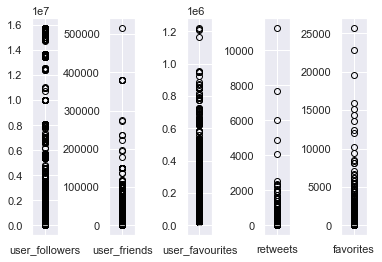

In [28]:
box(main, continuous);
# different scales
# outliers on user_friends, retweets, favorites
#   --> use StandardScaler, 
#       but if use neural networks later, may need MixManScaler

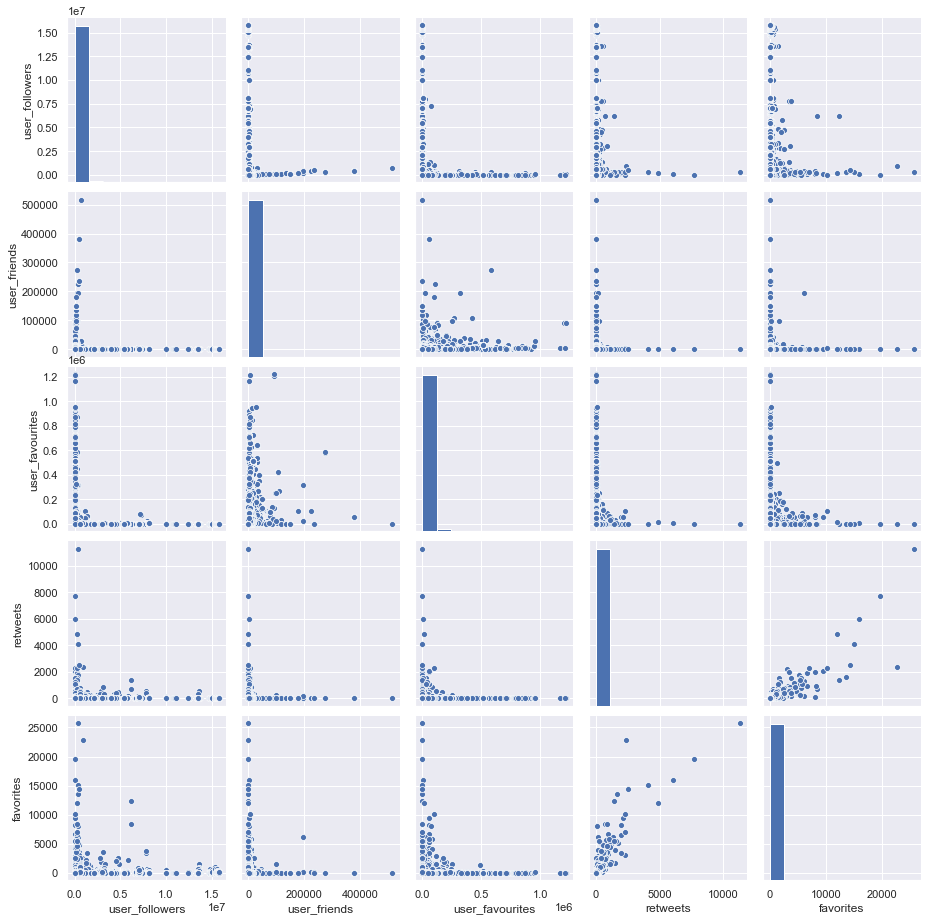

In [29]:
sns.pairplot(main[continuous]);
# seeming linear correlation between number of favorites and
#   retweets
# number of retweets does not seem to be affected by the 
#   number of friends or followers

## possible question: can retweets be predicted?

EDA Findings and Plan on Continuous data:

- with different scales 
- with outliers 

--> impute with median

--> use StandardScaler, but may need to shift to MixManScaler if use neural network later

#### EDA on Discrete data

In [62]:
def plotting_disc(df, group):
    plt.figure(figsize=(10,10))
    n=1
    plt.subplots(6,1)
    for var in group:
        plt.subplot(6,1,n, label = var)
        df[var].plot();
        plt.ylabel(None)
        plt.xlabel(None);
        plt.legend(bbox_to_anchor=(1,1))
        n+=1;


<Figure size 720x720 with 0 Axes>

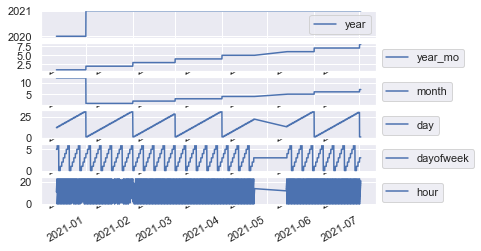

In [63]:
plotting_disc(main, discrete);
# increasing number of tweets as the year_mo goes
# month not very contributory for now, as it's been <1year
# cyclical day, days of week and hour --> explore

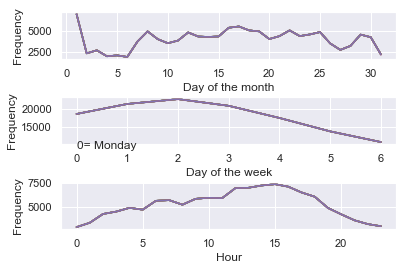

In [64]:
# plotting times that showed cyclical patterns
day_ = main.groupby('day')
dayofweek_ = main.groupby('dayofweek')
hour_ = main.groupby('hour')

plt.subplot(311)
plt.plot(day_.count())
plt.xlabel('Day of the month')
plt.ylabel('Frequency');

plt.subplot(312)
plt.plot(dayofweek_.count())
plt.xlabel('Day of the week');
plt.ylabel('Frequency')
plt.text(0,9000, '0= Monday')

plt.subplot(313)
plt.plot(hour_.count())
plt.xlabel('Hour');
plt.ylabel('Frequency');
plt.subplots_adjust(hspace=0.8)
# generally higher numbers of tweets in the middle of the month
# higher number of tweets in the middle of the week, lowest on weekends
# highest number of tweets in the midday - afternoon

EDA Findings and Plan on Discrete data:

- increasing frequency of tweets as the months go
- higher number of tweets in the middle of the month, week and day

--> impute with mode

--> scale, use the same as above

#### EDA on Categorical data

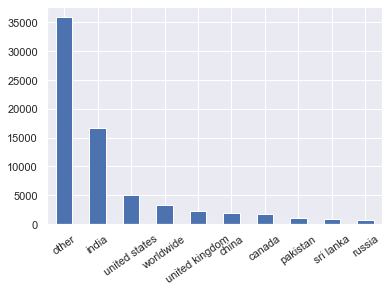

In [67]:
main.user_location.value_counts().head(10).plot(kind='bar', rot=35);
# Other: missing
# India and US leads by far
# significant missing --> should not impute

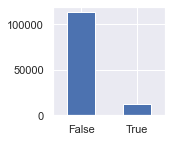

In [68]:
plt.figure(figsize=(2,2))
main.user_verified.value_counts().head(10).plot(kind='bar',rot=0);
# Most not verified users

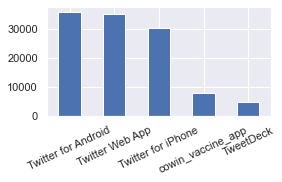

In [69]:
plt.figure(figsize=(4,2))
main.source.value_counts().head(5).plot(kind='bar',rot=25);
# Most used twitter-based aps

EDA Findings and Plan on Categorical data;

- with significant number of missing location values
- India and US has the most number of tweets
- most tweeters are unverified and comes from twitter-originated apps
- most continents apart from Antarctica and Africa are well represented (finding from substudy, not included for brevity)

--> cannot impute missing data for location (too numerous; assign its own category 'Others')

--> use label encoder for now (check need for OHE/ dummy later)

#### EDA on Text data

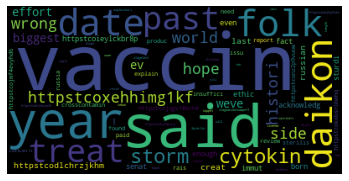

In [72]:
from wordcloud import WordCloud
text = ''.join((str(main['new'])))
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.grid(False)
plt.axis('off');
## daikon = radish?

EDA Findings and Plan on Text data 

- the predominant words are 'vaccine','said','year'

--> unlikely to contribute much if objective of study
is to get sentiment based on words

--> use tfidfvectorizer

#### Answering Research Question

#### Question 1:   What is the profile of tweets for Covid vaccination?

Time profile:

Tweets started in 2020 December, and the number has progressively increased until 2021 June.  There were a higher number of tweets in the middle of the month, week and day.  

User profile:

Most tweets come from unverified users, predominantly from India and the US, and sent through Twitter-associated applications.  

Text profile:

The top words tweeted were 'vaccine', 'said' and 'year'.

### VII.  Modelling Process to Determine Positive/ Negative Sentiment: 

#### *Outline*

####   A.  Training Data

1.  Identify and Load Training Data Set


2.  Initial Exploration and Preprocessing 
      
      
3.  Model Classifiers

      a.  Initial run using cross validation, use metrics accuracy and AUC
      
      b.  Iteration run using test set on the Training Data
      
      
4.  Hyperparameter Tuning

####  B.  Main Data

1.  Predict the sentiment on the main data tweet text utilizing the model generated on the Training data

### VII. A.  Modelling Training Data Set

#### A. 1.  Identify and Load Training Data

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [75]:
# Data Source: http://help.sentiment140.com/for-students
# automatically generated training set
# 0 = negative, 2 = neutral, 4= positive
# positive emoticons -> positive, negative-> negative
# widely used
# but, cannot see any publication showing validated labeling
emo2=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=['target','id','time','flag','user','text'])
emo2 = emo2[['target', 'text']]
emo2.sample(3)

,target,text
382381,0,doesn't know how her footage ended up letter-boxed but never mind il ave to re capture again xx
1313678,4,@ouphotoguy well done mark bullying way 2 go - j/k. Graeme now reading twttr but not posting - weird but we all have 2 srt somewhere
1564914,4,Summer is almost here


In [76]:
emo2.info()
# significant number of observations at 1.6M
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


#### VII.  A.  2.  Initial Exploration and Preprocessing of Training Data

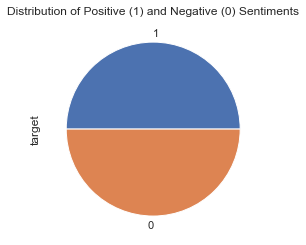

In [79]:
# replace label
emo2['target'] = emo2.target.replace(4,1)

emo2.target.value_counts().plot(kind='pie')
plt.title('Distribution of Positive (1) and Negative (0) Sentiments');
# no neutral
# balanced distribution

In [80]:
# early splitting of train/ test
from sklearn.model_selection import train_test_split

train, test = train_test_split(emo2, test_size=0.2, random_state=0)
print(train.shape)
print(test.shape)

(1280000, 2)
(320000, 2)


In [81]:
# exploring tweet text
train.text.head()
## with cleaner text compared to main data
## will utilitize previously constructed preprocessing 

1519669                                                                                                 @stefany_nyappy thx  i like ur pic as well!!
1245284                                                            http://twitpic.com/6f4a2 - Who wore it better?  @cosgrovemirana or @mileycyrus ? 
1299040    Can't get it to work as yet, thinking there MUST b a switch in the garage. Exciting! I have plans now 4 fairy lights around the parasol! 
200654                                                               @suyuen hmm.. not sure if i know how to fill out a ticket.  i'm a complete n00b
699963                                                                           @babysteph   I'm so sorry. Lots of peaceful healing vibes for her. 
Name: text, dtype: object

In [82]:
# cleaning text using previously defined custom function
train['new'] = train['text'].apply(cleaning)
train.head()

,target,text,new
1519669,1,@stefany_nyappy thx i like ur pic as well!!,"[thx, like, ur, pic, well]"
1245284,1,http://twitpic.com/6f4a2 - Who wore it better? @cosgrovemirana or @mileycyrus ?,"[httptwitpiccom6f4a2, wore, better]"
1299040,1,"Can't get it to work as yet, thinking there MUST b a switch in the garage. Exciting! I have plans now 4 fairy lights around the parasol!","[cant, get, work, yet, think, must, b, switch, garag, excit, plan, 4, fairi, light, around, parasol]"
200654,0,@suyuen hmm.. not sure if i know how to fill out a ticket. i'm a complete n00b,"[hmm, sure, know, fill, ticket, im, complet, n00b]"
699963,0,@babysteph I'm so sorry. Lots of peaceful healing vibes for her.,"[im, sorri, lot, peac, heal, vibe]"


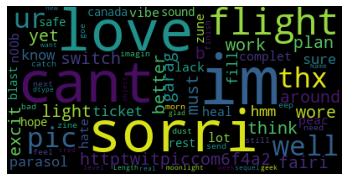

In [83]:
# visualizing most commonly used tweet words in the training data
from wordcloud import WordCloud
text = ''.join((str(train['new'])))
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.grid(False)
plt.axis('off');

##### Vectorization

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer weighs the words, not just counts
# utilize previously defined custom function
# identify top 1000 text features
vectorizer = TfidfVectorizer(analyzer = cleaning,
                            max_features = 1000)
vector = vectorizer.fit_transform(train['text']) # unprocessed data

In [85]:
vector_df = pd.DataFrame(vector.toarray(), columns = vectorizer.get_feature_names())
vector_df.head()
# note: toarray() renders the dense version
# data already scaled

,,1,10,100,11,12,15,1st,2,20,2day,2nd,3,30,4,5,6,7,8,9,abl,absolut,account,ach,act,actual,ad,add,addict,afternoon,age,ago,agre,ah,ahead,ahh,ahhh,aint,air,airport,album,allow,almost,alon,along,alot,alreadi,alright,also,although,alway,amaz,amp,angel,annoy,anoth,answer,anymor,anyon,anyth,anyway,apart,app,appar,appl,appreci,arent,arm,around,arriv,art,as,ask,asleep,ate,...,watch,watchin,water,way,wear,weather,web,websit,wed,wednesday,week,weekend,weird,welcom,well,went,what,whatev,white,who,whole,wife,win,window,wine,wish,wit,without,woke,woman,wonder,wont,woo,word,work,world,worri,wors,worst,worth,would,wouldnt,wow,write,wrong,wtf,x,xd,xoxo,xx,xxx,ya,yall,yay,ye,yea,yeah,year,yep,yesterday,yet,yo,youll,your,youtub,youv,yr,yummi,yup,½,à,â,ï,ð,ñ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.359248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315093,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
vector_df.shape

(1280000, 1000)

In [87]:
vector_df.sum().sort_values(ascending=False).head(10)

im       35170.631987
go       29831.785407
get      23645.649234
day      23200.660322
good     23055.957518
work     22241.664284
love     21710.048765
thank    20418.147636
like     19691.899962
miss     17649.320479
dtype: float64

*Identification of Features to be used for modelling*

In [89]:
y_train = train['target']
y_test = test['target']

X_train = vector

In [90]:
# processing for X_test
test['new'] = test['text'].apply(cleaning)
X_test = vectorizer.transform(test['text']) # unprocessed data

#### VII.  A.  3.  Model Classifiers for the Training Data
####         a.    Cross validation runs

SGD Classifier Accuracy=  0.749146875
SGD Classifier AUC=  0.8275879074113675


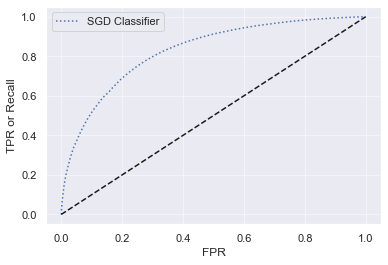

In [193]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
# default loss hinge, ie implementation of Linear SVM
# if loss log, then implementation of log_reg

sgd_clf = SGDClassifier()
sgd_model = sgd_clf.fit(X_train, y_train)

cv= cross_val_score(sgd_model, X_train, y_train,
               cv=5).mean()
print('SGD Classifier Accuracy= ', cv)

sgd_y_scores = cross_val_predict(sgd_model, X_train, y_train,
                           cv=5, method = 'decision_function')
fpr, tpr, thresholds = roc_curve(y_train, 
                          sgd_y_scores)

def plotting_auc(classifier):
    plt.plot(fpr, tpr, 'b:', label= classifier)
    plt.grid()
    plt.xlabel('FPR')
    plt.ylabel('TPR or Recall')
    plt.plot([0,1], [0,1], 'k--')
    plt.legend()
    plt.grid(True, alpha =0.5);
    
plotting_auc('SGD Classifier')

print('SGD Classifier AUC= ', roc_auc_score(y_train, y_scores))

Naive Bayes Classifier Accuracy score=  0.7438921875
Naive Bayes Classifier AUC=  0.8275879074113675


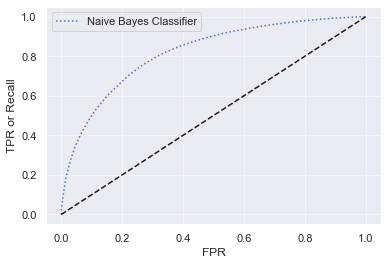

In [165]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB_model = BNB.fit(X_train, y_train)

cv= cross_val_score(BNB_model, X_train, y_train,
               cv=5).mean()
print('Naive Bayes Classifier Accuracy score= ', cv)

BNB_y_scores = cross_val_predict(BNB_model, X_train, y_train,
                           cv=5, method = 'predict_proba')[:,1]
fpr, tpr, thresholds = roc_curve(y_train, 
                          BNB_y_scores)

plotting_auc('Naive Bayes Classifier')

print('Naive Bayes Classifier AUC= ', roc_auc_score(y_train, y_scores))

Findings: 

| Model|   Accuracy | AUC|
| :-: | :-: | :-:|
| SGD Classifier | 74.91 |82.76
|Naive Bayes|74.39|81.91


**Notes:**   

* Attempts in modelling using SGD Classifier with kernel approximation, Perceptron and AdaBoost Classifiers did not result in good accuracy and AUC scores --> removed from analysis for brevity


* Attempt at using SVM Classifier confirmed results for SGD Classifier loss=hinge


* Attempt at using Logistic Regression showed similar results as SGD Classifier, even with default loss at hinge.  Since using a large dataset, will opt to use SGD implementation instead of Logistic Regression.

* Attempts at using PCA prior to modelling did not result in improved metrics --> removed for brevity

#### VII.  A.  3.  b.  Iteration run of model using Training Data's test subset

In [99]:
y_pred_sgd = sgd_clf.predict(X_test)
accuracy_score(y_pred_sgd, y_test)

0.749865625

In [100]:
y_pred_nb = BNB.predict(X_test)
accuracy_score(y_pred_nb, y_test)

0.743921875

Findings: 

| Model|   CV Accuracy | AUC|  Test Accuracy
| :-: | :-: | :-:| :-:
| SGD Classifier | 74.91 |82.76|74.99
|Naive Bayes|74.39|81.91|74.39


#### VII.  A.  4.   Hyperparameter Tuning

In [119]:
from sklearn.model_selection import RandomizedSearchCV

# for sgd classifier
param_grid = {
    'loss': ['hinge','log','modified_huber','squared_hinge'], # default hinge
    'penalty': ['l2','elasticnet'], # default l2
    'alpha': [0.01, 0.001, 0.0001], # default regularization multiple 0.0001
    'max_iter': [100, 500, 1000], # default 1000
    'tol': [0.01, 0.001, 0.005], # default stopping criterior 1e-3
    'learning_rate': ['constant','optimal','adaptive'], # default optimal
    'eta0': [0.001], # default 0.0
    'early_stopping': [True, False], # default False
    'n_iter_no_change': [3, 5, 7], # default 5
    'warm_start':[True, False], # default False
}

sgd_clf = SGDClassifier()

sgd_search = RandomizedSearchCV(estimator = sgd_clf,
                           param_distributions = param_grid,
                           cv=5,
                           random_state=0,
                           n_jobs=-1)
sgd_search.fit(X_train, y_train)

print('Best Params: \n', sgd_search.best_params_)
print('\nBest Estimator: \n', sgd_search.best_estimator_)

## essentially logistic regression

Best Params: 
 {'warm_start': False, 'tol': 0.01, 'penalty': 'elasticnet', 'n_iter_no_change': 7, 'max_iter': 1000, 'loss': 'log', 'learning_rate': 'optimal', 'eta0': 0.001, 'early_stopping': True, 'alpha': 0.0001}

Best Estimator: 
 SGDClassifier(early_stopping=True, eta0=0.001, loss='log', n_iter_no_change=7,
              penalty='elasticnet', tol=0.01)


In [120]:
y_pred_sgd = sgd_search.best_estimator_.predict(X_test)
accuracy_score(y_pred_sgd, y_test)
## no signif change

0.748890625

In [121]:
from sklearn.model_selection import RandomizedSearchCV

# for Bernoulli NB
param_grid = {
    'alpha': [0.5, 1.0, 1.5], # default smoothing 1.0
    'binarize': [0.0, None], # default 0.0
    'fit_prior': [True, False], # default True
    'class_prior': [None] # default None
}

BNB = BernoulliNB()

BNB_search = RandomizedSearchCV(estimator = BNB,
                           param_distributions = param_grid,
                           cv=5,
                           random_state=0,
                           n_jobs=-1)
BNB_search.fit(X_train, y_train)

print('Best Params: \n', BNB_search.best_params_)
print('\nBest Estimator: \n', BNB_search.best_estimator_)



Best Params: 
 {'fit_prior': True, 'class_prior': None, 'binarize': 0.0, 'alpha': 1.0}

Best Estimator: 
 BernoulliNB()


In [122]:
y_pred_BNB = BNB_search.best_estimator_.predict(X_test)
accuracy_score(y_pred_sgd, y_test)
## no signif change

0.748890625

Findings: 

| Model|   CV Accuracy | AUC|  Test Accuracy (Default Params) | Test Accuracy (Tuned Params)
| :-: | :-: | :-:| :-: |:-:
| SGD Classifier | 74.91 |82.76|74.99|74.89
|Naive Bayes|74.39|81.91|74.39|74.89

* The model that provided that best accuracy was the SGD Classifier using default parameters.

|Hyperparameter|Default|'Best' 
|:-:|:-:|:-:
|loss|hinge|log
|penalty|l2|elasticnet
|alpha|0.0001|0.0001
|max_iter|1000|1000
|tol|1e-3|0.01
|learning_rate|optimal|optimal
|eta0|0.0|0.001
|early_stopping|False|True
|n_iter_no_change|5|7
|warm_start|False|False

* The hypertuned parameters showed a slightly lower accuracy probably because of the early stopping when scores are not improving by 0.01 for at least 7 epochs as an effort to avoid overfitting

####  VII.  A.  5.  Analyzing results of Model Prediction on Training Data's test subset

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [192]:
# incoporating predictions on the dataset
test['prediction']= y_pred_sgd

# exploring wrong predictions
test[ test['target'] != test['prediction']].head(5)
## context of 'f', 'not bad'
## phrase context lost
## some neutral

,target,text,new,prediction
182051,0,where the f are my pinking shears? rarararrrarararr...babyproofing while cutting stuff makes me stick shears random places &amp; forget them,"[f, pink, shear, rarararrrarararrbabyproof, cut, stuff, make, stick, shear, random, place, amp, forget]",1
1092137,1,"@saragarth Not bad, bit grumpy cause of exams but generally OK ta x","[bad, bit, grumpi, caus, exam, gener, ok, ta, x]",0
217849,0,Song Of My Life Now...Your Love Is A Lie-Simple Plan *BeautifulyLost,"[song, life, nowyour, love, liesimpl, plan, beautifulylost]",1
220737,0,Watching the last Leno So glad I got to go once!,"[watch, last, leno, glad, got, go]",1
1334666,1,@hostile_bioform I dropped your books off in the library,"[drop, book, librari]",0


Confusion Matrix: 
 [[0.35811562 0.14130625]
 [0.10980313 0.390775  ]]
Accuracy (%):  74.89
Precision (%):  73.44
Recall (%):  78.06
F1 score (%):  75.68


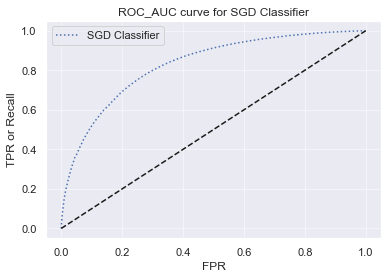

In [383]:
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_sgd, normalize='all'))

print('Accuracy (%): ', round((accuracy_score(y_pred_sgd, y_test)*100),2))
print('Precision (%): ',(precision_score(y_test, y_pred_sgd)*100).round(2))

print('Recall (%): ',(recall_score(y_test, y_pred_sgd)*100).round(2))

print('F1 score (%): ',(f1_score(y_test, y_pred_sgd)*100).round(2))

y_score = sgd_clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, 
                          y_score)
plotting_auc('SGD Classifier')
plt.title('ROC_AUC curve for SGD Classifier');

Findings:

-  The model was able to give correct predictions 75% of the time, with acceptable precision and recall.


-  The wrong predictions are more likely due to loss of context, (e.g. meaning of 'f', 'not bad'), and the forcing of labelling of neutral tweets to either positive or negative.


-  It is unlikely that further improvement in hyperparameters could be achieved considering that context is the main reason for wrong predictions.  Models that use word relationships such as Embedding could provide a more accurate labelling.

#### Answering Research Questions

#### Question 2.  Can we classify a tweet as positive or negative based on the text content?

Yes, we can classify a tweet's positive or negative sentiment based on its text content with 75% accuracy.


#### VII.  B.  1.  Predicting Labels on the Main Data using SGD Classifier Model

In [195]:
#ref sgd_model = sgd_clf.fit(X_train, y_train)
#ref y_pred_sgd = sgd_clf.predict(X_test)
main['new'].head(3)
# still with https, but further attempts to remove this with str(text) 
#    results in data mix again

date
2020-12-20 06:06:44                        [folk, said, daikon, past, could, treat, cytokin, storm, httpstcoxehhimg1kf]
2020-12-13 16:27:13    [world, wrong, side, histori, year, hope, biggest, vaccin, effort, weve, ev, httpstcodlchrzjkhm]
2020-12-12 20:33:45                                        [russian, vaccin, creat, last, 24, year, httpstcoieylckbr8p]
Name: new, dtype: object

In [204]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfvec', TfidfVectorizer(analyzer = cleaning,
                             max_features = 1000)),
    ('sgd_clf', SGDClassifier())  # using default settings which gave the best accuracy
])

# using whole Training set (unsplit)
pipeline.fit(emo2['text'], emo2['target']) 

# using all text in the main covid set
prediction = pipeline.predict(main['text'])

In [212]:
main['sentiment'] = prediction
main[['text','new','sentiment']].sample(5)

,text,new,sentiment
date,,,
2021-03-18 15:55:23,@fordnation Who is eating alone today because Doug Ford and Mr. Trudeau Toronto Ontario Canada forced you to stay h… https://t.co/DCluDwtS0G,"[eat, alon, today, doug, ford, mr, trudeau, toronto, ontario, canada, forc, stay, h, httpstcodcludwts0g]",0
2021-06-04 12:41:00,"$MRNA enters an Uptrend because Momentum Indicator exceeded the 0 level on May 24, 2021. View odds for this and oth… https://t.co/Sh8jmBMNky","[mrna, enter, uptrend, momentum, indic, exceed, 0, level, may, 24, 2021, view, odd, oth, httpstcosh8jmbmnki]",1
2021-06-12 08:38:54,"Fully #covaxinated , 2nd Dose of #Covaxin . Thanks to @nhm_assam &amp; Terapanth Bhawan Jain Swetambar samaj for the dr… https://t.co/H4N6HrtJ1r","[fulli, 2nd, dose, thank, amp, terapanth, bhawan, jain, swetambar, samaj, dr, httpstcoh4n6hrtj1r]",1
2021-04-15 13:30:00,#Russia said that its #SputnikV vaccine does not cause blood clots.\nRead more: https://t.co/ptLp4hz5iA,"[said, vaccin, caus, blood, clot, read, httpstcoptlp4hz5ia]",1
2021-04-10 08:43:02,"Now that there is a shortage of vaccines, COVID is the only way to get antibodies to avoid COVID.\n\n#COVID19India… https://t.co/XZHwvTzKGD","[shortag, vaccin, covid, way, get, antibodi, avoid, covid, httpstcoxzhwvtzkgd]",1


In [209]:
# percent distribution of sentiments
((main.sentiment.value_counts()) /N *100).round(2)

1    74.84
0    25.16
Name: sentiment, dtype: float64

#### Answering Research Questions

#### Question 3.  Is the mass response to the covid vaccination predominantly positive or negative?

The sentiment response to Covid vaccination is predominantly good, with 3 out of 4 tweets being labelled as positive.

### VIII.   Post-labelling Exploration of Main Data

In [214]:
positive = main [main['sentiment'] ==1]
negative = main [main['sentiment'] ==0]

####  Location

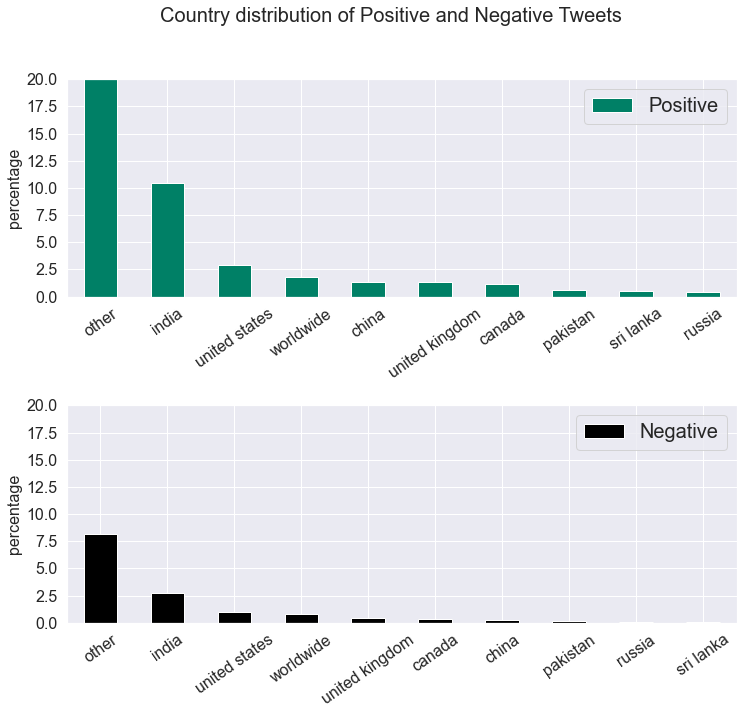

In [344]:
# user_location
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
pos=((positive['user_location'].value_counts())/N*100).head(10)
pos.plot.bar(rot=35, label='Positive', fontsize=16, cmap ='summer')
plt.ylabel('percentage', fontsize=16)
plt.xticks(fontsize=16);
plt.legend(fontsize=20)
plt.ylim(0,20)

plt.subplot(2,1,2)
neg=((negative['user_location'].value_counts())/N*100).head(10)
neg.plot.bar(rot=35, label='Negative',fontsize=16, cmap='copper')
plt.ylim(0,20)
plt.ylabel('percentage', fontsize=16)
plt.xticks(fontsize=16);
plt.legend(fontsize=20);

plt.suptitle('Country distribution of Positive and Negative Tweets', fontsize=20)
plt.subplots_adjust(hspace=0.5)

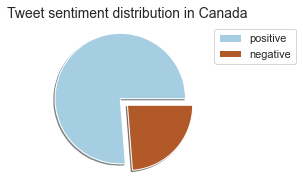

In [287]:
canada = main [main.user_location =='canada']
plt.figure(figsize=(3,3))
(canada.sentiment.value_counts(normalize=True)).plot(kind='pie',
                                        cmap = 'Paired',
                                        labels=None,
                                        explode = (0.15,0),
                                        shadow =True)
plt.legend(labels = ('positive','negative'), bbox_to_anchor=(1,1), facecolor='white')
plt.title('Tweet sentiment distribution in Canada', fontsize=14)
plt.ylabel(None);

Findings:

India, US and worldwide are the top 3 locations for both positive and negative tweets, with tweets being predominantly positive.

In Canada, 76% of the tweets were positive.

In [346]:
main.head(1)

,user_location,user_followers,user_friends,user_favourites,user_verified,text,source,retweets,favorites,year,year_mo,month,day,dayofweek,hour,new,sentiment
date,,,,,,,,,,,,,,,,,
2020-12-20 06:06:44,la crescentamontrose ca,405,1692,3247,False,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,Twitter for Android,0,0,2020,1,12,20,6,6,"[folk, said, daikon, past, could, treat, cytokin, storm, httpstcoxehhimg1kf]",0


#### Quantity of Followers and Friends

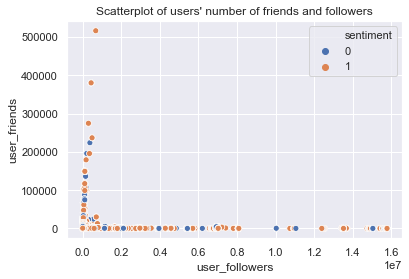

In [384]:
sns.scatterplot(x = main.user_followers, y=main.user_friends, hue=main.sentiment )
plt.title("Scatterplot of users' number of friends and followers");

In [361]:
popular = main [main.user_followers > 1.575e7]
pop_pos = popular[ popular.sentiment ==1]
pop_pos
## a prolific tweeter from india

,user_location,user_followers,user_friends,user_favourites,user_verified,text,source,retweets,favorites,year,year_mo,month,day,dayofweek,hour,new,sentiment
date,,,,,,,,,,,,,,,,,
2021-06-26 05:36:33,india,15750361,15,0,True,"#NDTVExclusive | “Both #Covaxin and #Covishield are safe for pregnant women”: Dr Randeep Guleria, Director, AIIMS (… https://t.co/8Yubq8Gror",Twitter Media Studio - LiveCut,25,117,2021,7,6,26,5,5,"[, safe, pregnant, woman, dr, randeep, guleria, director, aiim, httpstco8yubq8gror]",1
2021-06-24 10:33:42,india,15750504,15,0,True,"#JustIn | West Bengal CM Mamata Banerjee writes to PM Modi: ""I request for your kind intervention so that an early… https://t.co/jWZlzB2R8Z",Twitter Web App,25,217,2021,7,6,24,3,10,"[west, bengal, cm, mamata, banerje, write, pm, modi, request, kind, intervent, earli, httpstcojwzlzb2r8z]",1
2021-06-30 00:47:57,india,15773498,15,0,True,Brazil To Suspend #Covaxin Deal As Graft Allegations Probed https://t.co/z4ON8CEdZL https://t.co/LMD8JiFUCK,Twitter Web App,25,184,2021,7,6,30,2,0,"[brazil, suspend, deal, graft, alleg, probe, httpstcoz4on8cedzl, httpstcolmd8jifuck]",1
2021-06-28 17:05:37,india,15773576,15,0,True,".@OnReality_Check | In its affidavit to the Supreme Court, the government projects supply of 8 crore #Covaxin doses… https://t.co/61hwC461us",Twitter Media Studio,18,58,2021,7,6,28,0,17,"[affidavit, suprem, court, govern, project, suppli, 8, crore, dose, httpstco61hwc461u]",1
2021-06-30 02:58:53,india,15780656,15,0,True,"#Moderna approved for emergency use, 4th vaccine okayed by India\n\n#COVID19Vaccine https://t.co/lEvtKkpHES",Twitter Media Studio - LiveCut,23,154,2021,7,6,30,2,2,"[approv, emerg, use, 4th, vaccin, okay, india, httpstcolevtkkph]",1
2021-06-29 11:41:58,india,15780656,15,0,True,#Cipla Allowed To Import #Moderna Vaccine For Use In India \n\nNDTV’s Sukirti Dwivedi reports\n\nRead more:… https://t.co/1apwxoCwQg,Twitter Media Studio - LiveCut,37,119,2021,7,6,29,1,11,"[allow, import, vaccin, use, india, ndtv, sukirti, dwivedi, report, read, httpstco1apwxocwqg]",1
2021-06-29 11:01:04,india,15780656,15,0,True,"#CovidVaccine | ""New drug permission has been granted to #Moderna, the first internationally developed vaccine. Thi… https://t.co/d1nm7YEOlE",Twitter Web App,15,167,2021,7,6,29,1,11,"[new, drug, permiss, grant, first, intern, develop, vaccin, thi, httpstcod1nm7yeol]",1
2021-06-29 10:32:57,india,15780656,15,0,True,#Cipla Allowed To Import #Moderna Vaccine For Use In India: Sources \n\nNDTV’s Sukirti Dwivedi reports\n\nRead more:… https://t.co/BjFu26UvsR,Twitter Media Studio - LiveCut,24,125,2021,7,6,29,1,10,"[allow, import, vaccin, use, india, sourc, ndtv, sukirti, dwivedi, report, read, httpstcobjfu26uvsr]",1
2021-06-29 08:59:07,india,15780657,15,0,True,"#Moderna Seeks Nod For Vaccine In India, Cipla For Import, Sale: Sources \n\nNDTV's Sukirti Dwivedi reports\n\nRead mor… https://t.co/fnXUCCV9aV",Twitter Media Studio - LiveCut,4,43,2021,7,6,29,1,8,"[seek, nod, vaccin, india, cipla, import, sale, sourc, ndtv, sukirti, dwivedi, report, read, mor, httpstcofnxuccv9av]",1


In [376]:
# limiting to Canada
canada = main [ main.user_location == 'canada']
# limiting to positive sentiment
can_pos= canada [ canada.sentiment == 1]
# limiting to tweets being retweeted more than 20x
can_pos_ret = can_pos [can_pos.retweets >20]
# limiting to users with more than 50 000 followers
can_pos_ret [ can_pos_ret.user_followers > 50000]

,user_location,user_followers,user_friends,user_favourites,user_verified,text,source,retweets,favorites,year,year_mo,month,day,dayofweek,hour,new,sentiment
date,,,,,,,,,,,,,,,,,
2021-06-03 17:01:48,canada,89478,1146,8046,True,The #Moderna and #Pfizer vaccines are both mRNA vaccines that are very similar. Both were tested &amp; approved for saf… https://t.co/o9Myqil8wA,Hootsuite Inc.,21,53,2021,7,6,3,3,17,"[vaccin, mrna, vaccin, similar, test, amp, approv, saf, httpstcoo9myqil8wa]",1
2021-06-18 17:02:09,canada,90200,1148,8155,True,The #Moderna and #Pfizer vaccines are both mRNA vaccines that are very similar. Both were tested &amp; approved for saf… https://t.co/UQIbdqFjIO,Hootsuite Inc.,68,212,2021,7,6,18,4,17,"[vaccin, mrna, vaccin, similar, test, amp, approv, saf, httpstcouqibdqfjio]",1


In [380]:
# limiting to Canada
canada = main [ main.user_location == 'canada']
# limiting to positive sentiment
can_neg= canada [ canada.sentiment == 0]
# limiting to tweets being retweeted more than 20x
can_neg_ret = can_neg [can_neg.retweets >20]
# limiting to users with more than 10 000 followers
can_neg_ret [ can_neg_ret.user_followers > 7500]

## negative sentiment coming from cancellations and 
## frustration over lack of update

,user_location,user_followers,user_friends,user_favourites,user_verified,text,source,retweets,favorites,year,year_mo,month,day,dayofweek,hour,new,sentiment
date,,,,,,,,,,,,,,,,,
2021-04-14 15:06:49,canada,8632,2287,14418,False,"10,000 vaccination appointments cancelled in #Scarborough ALONE &amp; #Moderna shipments are delayed 10 DAYS. That's p… https://t.co/s5vIYkRccu",TweetDeck,56,132,2021,5,4,14,2,15,"[10000, vaccin, appoint, cancel, alon, amp, shipment, delay, 10, day, that, p, httpstcos5viykrccu]",0
2021-04-14 13:13:08,canada,12352,1227,6746,True,These cancellations were prompted by 1-week delays in #Moderna shipments: https://t.co/PHA0sdaYP0\n\nIf supply is cho… https://t.co/syvywOkVDY,Twitter Web App,31,129,2021,5,4,14,2,13,"[cancel, prompt, 1week, delay, shipment, httpstcopha0sdayp0, suppli, cho, httpstcosyvywokvdi]",0
2021-04-15 17:39:25,canada,13573,1234,6830,True,I appreciate the clarifications—still many questions:\n\nWhy are Ontarians being left to guess how much of the availa… https://t.co/v7lh28MMdQ,Twitter Web App,129,546,2021,5,4,15,3,17,"[appreci, clarif, still, mani, question, ontarian, left, guess, much, availa, httpstcov7lh28mmdq]",0
2021-05-16 13:29:23,canada,7531,628,7682,False,#BreakingNews #COVAXIN Study is PUBLISHED by OXFORD. #BharatBiotech Covaxin effective against ALL emerging COVID-… https://t.co/E2GRViGO6N,Twitter Web App,23,52,2021,6,5,16,6,13,"[studi, publish, oxford, covaxin, effect, emerg, covid, httpstcoe2grvigo6n]",0
2021-06-07 01:02:11,canada,12774,1271,5000,False,🗓 June 7&amp;8 \n\n💉 #Moderna Clinics \n \n1️⃣st dose: Drop in: 18+ who live/work/attend school in hotspots listed👇\n2️⃣nd d… https://t.co/4sJBk2zyLO,Twitter for iPhone,28,37,2021,7,6,7,0,1,"[, june, 7amp8, clinic, 1, st, dose, drop, 18, liveworkattend, school, hotspot, list, 2, nd, httpstco4sjbk2zylo]",0
2021-06-15 21:31:06,canada,63959,18435,177704,True,#Vaccinated #Moderna \n2nd shot in the arm. ✅ https://t.co/WPupw4afDX,Twitter for iPhone,43,2465,2021,7,6,15,1,21,"[2nd, shot, arm, httpstcowpupw4afdx]",0


#### Global Findings:

A user from India has a prolific number of followers, and whose tweets frequently get retweeted.


#### Focusing on Canada:


Certain users have more than 50 000 followers and whose tweets get retweeted more than 20x.  Barring privacy rules, these individuals may be recruited for advocacy.


From the negative tweets that are retweeted more than 20x, it can be seen that problem is cancellation of appointments and the lack of update from the governing bodies.

#### Answering Research Questions

#### Question 4.  Can we identify subgroups that show predominantly positive and negative tweets?

Popular users may be identified.

--> if privacy rules allow, these individuals may be encouraged to publish more positive tweets to advocate for vaccination.

Popular negative tweets involve cancellation of vaccination appointments and frustration from lack of updated information.  

-->  The Ministry could address these problems to help alleviate the negative sentiment for the vaccination.

### IX.  Summary and Recommendations

#### 1.  Tweets on Covid vaccination has been progressively increasing since December 2020.  Most users are from India and the US, with good representation on most continents.

--> Since the problem is global, it is good to use a tool that would analyze the problem with a wide breadth, such as Twitter.  Understandably, there are technological social limitations to using the application, but it is an acceptable tool to use in gaining a general picture.

#### 2.  Using a dataset that has labelled twitter texts as either a positive or negative, a Stochastic Gradient Descend classifier model was generated, yielding a 75% accuracy in predicting text sentiment.   

-->  Due to the importance of the vaccination practice being accepted by the general population, it is incumbent for the Health department to monitor the public response.  This model will enable the staff to evaluate the distribution of positive and negative sentiments based on Tweets generated by the masses.

--> Further improvement in accuracy may be obtained by adding a Neutral sentiment label, or by using Embedding models and deep learning.  However, for general purposes, the SGD Classifier model should be effective.

#### 3.  The predominant sentiment in the Covid vaccination tweets is positive.

--> This gives an idea that current measures are well accepted.  

#### 4.  Popular tweets and users may be identified.  

-->  Popular users who generally publish positive tweets should be encouraged to continue or increase their activity so they would act as advocates for vaccination.

-->  Popular negative tweets may be analyzed to identify problems.  This set of tweets show discontent about cancellation of appointments and frustration over lack of updates.  The Health department can address these problems to enable a more effective public acceptance.

### X.  Conclusion

The sentiment of tweets may be determined with 75% accuracy.  The tweets regarding Covid vaccination are predominantly positive.  Details may be harvested for optimization of vaccination practices.